In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import iqr

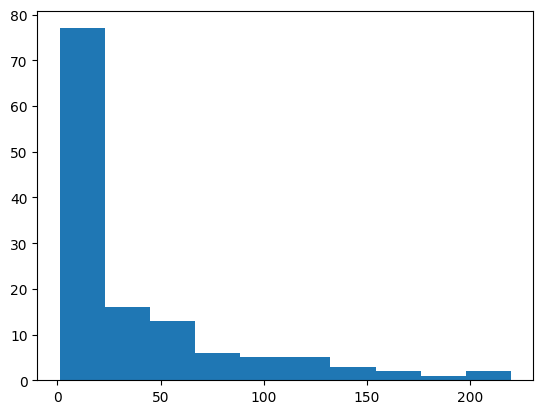

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [ ]:
food = pd.read_csv('food.csv')
rice = food[food['food_category'] == 'rice']
plt.hist(rice['co2_emission'])
plt.show()
print(rice['co2_emission'].agg(['mean', 'median']))

In [70]:
dists = rice['co2_emission'] - np.mean(rice['co2_emission'])
dists = dists ** 2
dists_sum = np.sum(dists)
vars = dists_sum / (rice.count() - 1)
print(vars) #variance
print(vars ** 0.5) #standard deviation

Unnamed: 0       2281.376243
country          2281.376243
food_category    2281.376243
consumption      2281.376243
co2_emission     2281.376243
dtype: float64
Unnamed: 0       47.763754
country          47.763754
food_category    47.763754
consumption      47.763754
co2_emission     47.763754
dtype: float64


In [71]:
#the more variance the more spread out the data is
var_co2 = np.var(rice['co2_emission'], ddof=1) #ddof=1 is used to calculate var/std by using sample population
std_co2 = np.std(rice['co2_emission'], ddof=1)
print(var_co2, std_co2)

2281.3762431067385 47.763754491316305


In [72]:
dists = rice['co2_emission'] - np.mean(rice['co2_emission'])
mean_abs_dev = np.mean(abs(dists))
print(mean_abs_dev) 
#std uses squares distances, so further the variable the bigger the deviation
#mean absolute deviation penalizes equally, yet SD is more common that MAD

35.74377514792899


15.2
[  1.22     6.0425  15.2     55.5925 219.76  ]


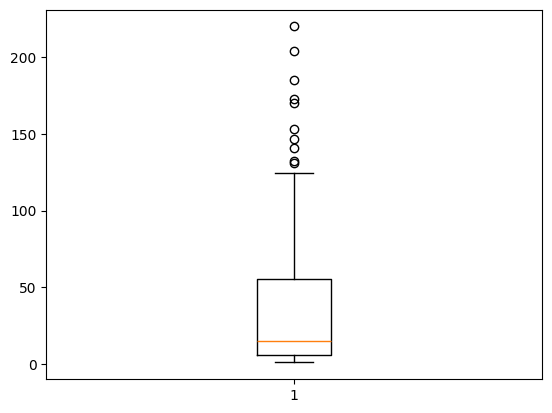

In [76]:
#quantiles
half = np.quantile(rice['co2_emission'], 0.5)
print(half) #50% of pop emit co2 less than 15.2 0.5 quantile = median
quartiles = np.quantile(rice['co2_emission'], [0, 0.25, 0.5, 0.75, 1])
quartiles = np.quantile(rice['co2_emission'], np.linspace(0, 1, 5)) #those two are the same where linspace(start, end, num)
print(quartiles) #these are quartiles
plt.boxplot(rice['co2_emission'])
plt.show()

In [80]:
#Interquantile range IQR
co2_iqr = np.quantile(rice['co2_emission'], 0.75) - np.quantile(rice['co2_emission'], 0.25)
print(co2_iqr) #distance between Q3 and Q1

49.55


In [86]:
#outliers
#data less than Q1 - 1.5*IQR or data more than Q3 + 1.5*IQR
co2_iqr = iqr(rice['co2_emission'])
lower = np.quantile(rice['co2_emission'], 0.25) - 1.5 * co2_iqr
upper = np.quantile(rice['co2_emission'], 0.75) + 1.5 * co2_iqr
outliers = rice[(rice['co2_emission'] < lower) | (rice['co2_emission'] > upper)]
outliers #those are outliers

,Unnamed: 0,country,food_category,consumption,co2_emission
1174,1175,Vietnam,rice,144.56,184.99
1196,1197,Myanmar,rice,132.80,169.94
1240,1241,Madagascar,rice,102.53,131.21
1295,1296,Philippines,rice,119.44,152.85
1350,1351,Thailand,rice,114.57,146.62
1372,1373,Cambodia,rice,159.10,203.60
1383,1384,Sierra Leone,rice,103.30,132.19
1394,1395,Sri Lanka,rice,109.72,140.41
1405,1406,Indonesia,rice,134.62,172.27
1427,1428,Bangladesh,rice,171.73,219.76


In [88]:
rice['co2_emission'].describe() #those are the same stuff as everything above

count    130.000000
mean      37.591615
std       47.763754
min        1.220000
25%        6.042500
50%       15.200000
75%       55.592500
max      219.760000
Name: co2_emission, dtype: float64

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


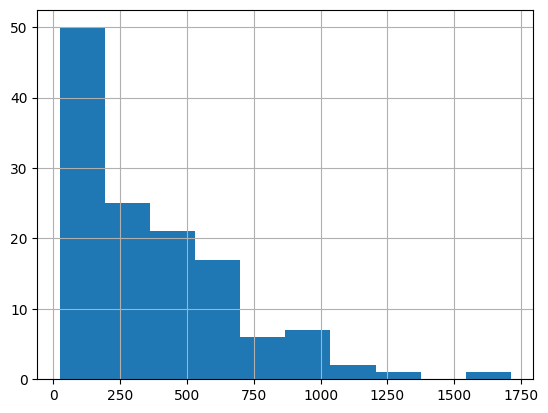

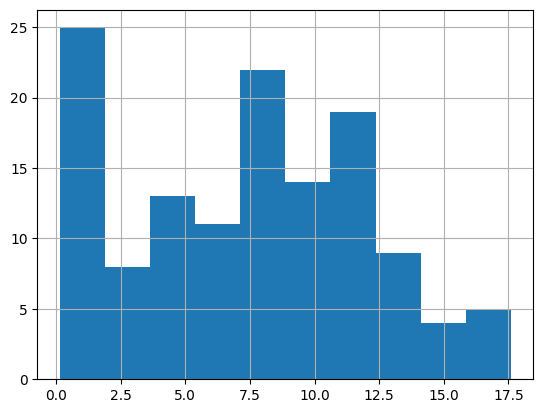

In [90]:
# Print variance and sd of co2_emission for each food_category
print(food.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
food[food['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food[food['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [93]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
